<center><font color="orange" size="6"><b>Titanic dataset</b></font></center><br>
<font size="5"><b>Find whether a person has survived from Titanic breakdown</b></font><br><br>

<font size='5'><b>Importing necessary libraries</b></font>

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size='5'><b>Loading dataset</b></font>

In [286]:
df = pd.read_csv("C:/Users/MANIKANTA/Desktop/GRIP/Titanic/train.csv")

In [287]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font size='4'><b>Pclass - Passenger Class<br><br>
    Sibsp  - Number of Siblings/Spouses Aboard. <br><br>
    Parch  - Number of Parents/Children Aboard.<br><br>
    Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</b><font>
    

In [288]:
df.shape

(891, 12)

In [289]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [290]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font size='3'><b>Here min_Fare is 0, which cannot be possible(Flaws in data)</b></font>

<font size='5'><b>Columns with Null values</b></font>

In [291]:
column_null = df.isnull().sum()
column_null[column_null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<font size='5'><b>Fraction of Null values in those columns</b></font>

In [292]:
column_null[column_null>0]/df.shape[0]

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [293]:
print(df["Survived"].value_counts())
print()
print(df["Sex"].value_counts())
print()
print(df["Pclass"].value_counts())
print()
print(df["Embarked"].value_counts())

0    549
1    342
Name: Survived, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<font size='5'><b>Deleting uneccesary columns which cannot determine the survival of a person</b></font>

In [294]:
#Deleting unnecessary columns for the training of model
del df["PassengerId"]
del df["Name"]
del df["Ticket"]

<font size='5'><b>Delete rows with column Fare = 0</b></font>

In [295]:
# Numeric data with 0 is also sometimes treated as Missing values
# Here Fare =0 is missing value since fare cannot be 0
# Delete the row with fare=0
df = df[df['Fare']!=0]
df.shape

(876, 9)

In [296]:
#Check for NULL values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
Cabin       675
Embarked      2
dtype: int64

<font size='5'><b>Impute Null values with suitable strategy</b></font>

In [297]:
# As null values with Embarked are 2 very less
# Delete those two rows
# df1 = df[df["Embarked"].notnull()]

# or

# We can fill the values using sklearn SimpleImpute class
from sklearn.impute import SimpleImputer 
# missing values - categorical - impute with mode (most frequent)
# possible strategies are "mean", "most_frequent", "median", "constant"
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(df[['Embarked']])
df['Embarked'] = mode_imputer.transform(df[['Embarked']]).ravel()
df1 = df.copy()
df1.head()

# or

# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [298]:
# Fill missing values of Age with average age
# df2  = df1;
# df2["Age"] = df1["Age"].fillna(df["Age"].mean())

# or

# missing values - numeric - impute with mean (most frequent)
#possible strategies are "mean", "most_frequent", "median", "constant"
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
mode_imputer = mode_imputer.fit(df1[['Age']])
df1['Age'] = mode_imputer.transform(df1[['Age']]).ravel()
df2 = df1.copy()
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [299]:
# Since 3/4th of data in "Cabin" is missing, so it's better to drop the whole column
del df2["Cabin"]

In [300]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [301]:
df2.shape

(876, 8)

<font size='5'><b>Correlation between coluns</b><font>

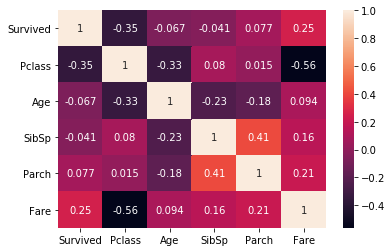

In [302]:
# Value closest to 1 indicates positive relation(inc-inc) or(dec-dec)
# Value closest to -1 indicates negative relation (inc-dec) or (dec-inc)
# Value closet to 0 indicates no relation
sns.heatmap(df2.corr(),annot=True)

<font size='5'><b>Being a female has more chances to survive</b></font>

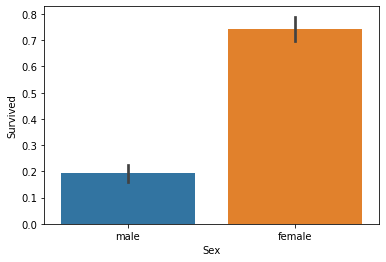

In [303]:
sns.barplot(x='Sex',y='Survived',data=df2)

<font size='5'><b>You have more probability to survuve if you hail from Pclass 1</b></font>

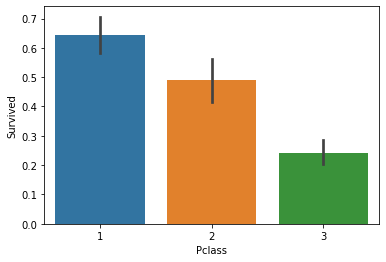

In [304]:
sns.barplot(x='Pclass',y='Survived',data=df2)

Text(0.5, 0, 'Pclass')

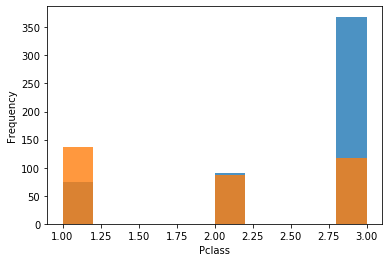

In [305]:
fig = df2.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.xlabel('Pclass')

<font size='5'><b>Detecting outliers in dataset using Guassian Normal Distribution</b></font>

(array([ 54.,  46., 176., 337., 114.,  70.,  44.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

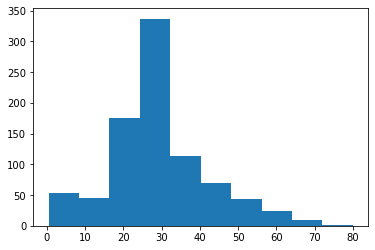

In [306]:
plt.hist(df2['Age'])

In [307]:
# Guassian or Normal distribution has the features of
# Mean = Median = Mode
# Bell curve
# 1 standard deviation from the mean covers 68% of data
# 2 standard deviation from the mean covers 95% of data
# 3 standard deviation from the mean covers 99% of data
# Then data other than 3 standard deviations is considered as an outlier
# Either we can remove those records or impute that particular column

mn = df2["Age"].mean()
sd = df2["Age"].std();
lower,upper = mn-3*sd,mn+3*sd
print("Lower_bound = ",lower,"\nUpper_bound = ",upper)
x = df2["Age"]<lower
y = df2["Age"]>upper
outlier_Age = x|y
df2[outlier_Age == True]

# or
# Z score of a value is number of standard deviations from mean the value is present
# Z score = (x-mean)/standard deviation
# Age_Z = (df2["Age"] - df2["Age"].mean()) / df2["Age"].std()
# x = Age_Z < -3
# y = Age_Z > 3
# outlier_Age = x|y
# df2[outlier_Age == True]

Lower_bound =  -9.587399314745944 
Upper_bound =  68.87783778716462


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [308]:
# Outliers using Normal distribution or Gaussisn distribution
mn = df2["Fare"].mean()
sd = df2["Fare"].std();
lower,upper = mn-3*sd,mn+3*sd
print("Lower_bound = ",lower,"\nUpper_bound = ",upper)
x = df2["Fare"]<lower
y = df2["Fare"]>upper
outlier_Fare = x|y
df2[outlier_Fare==True]

Lower_bound =  -117.05482740046511 
Upper_bound =  182.5661271721546


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.000000,3,2,263.0000,S
88,1,1,female,23.000000,3,2,263.0000,S
118,0,1,male,24.000000,0,1,247.5208,C
258,1,1,female,35.000000,0,0,512.3292,C
299,1,1,female,50.000000,0,1,247.5208,C
311,1,1,female,18.000000,2,2,262.3750,C
341,1,1,female,24.000000,3,2,263.0000,S
377,0,1,male,27.000000,0,2,211.5000,C
380,1,1,female,42.000000,0,0,227.5250,C
438,0,1,male,64.000000,1,4,263.0000,S


<font size='5'><b>Interquartile Range for outlier detection</b></font>

c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


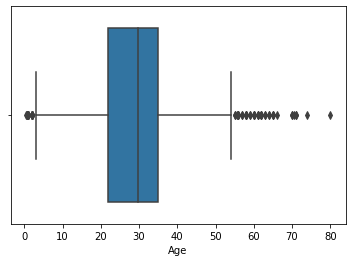

In [309]:
sns.boxplot(df2["Age"])

In [310]:
# IQR(Inter Quartile Range) can be used for non-Gaussian distribution to check outliers
q25, q75 = np.percentile(df2["Age"],25), np.percentile(df2["Age"],75)
print("25% Quartile = ",q25,"\n75% Quartile = ",q75)
k = 1.5
iqr = q75 - q25
lower, upper = q25 - k*iqr, q75 + k*iqr 
x = df2["Age"]<lower
y = df2["Age"]>upper
print("Lower_bound = ",lower,"\nUpper_bound = ",upper)
outlier_iqr_Age = x|y
df2[outlier_iqr_Age == True]

25% Quartile =  22.0 
75% Quartile =  35.0
Lower_bound =  2.5 
Upper_bound =  54.5


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
11,1,1,female,58.00,0,0,26.5500,S
15,1,2,female,55.00,0,0,16.0000,S
16,0,3,male,2.00,4,1,29.1250,Q
33,0,2,male,66.00,0,0,10.5000,S
...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C
829,1,1,female,62.00,0,0,80.0000,S
831,1,2,male,0.83,1,1,18.7500,S
851,0,3,male,74.00,0,0,7.7750,S


In [311]:
# IQR(Inter Quartile Range) can be used for non-Gaussian distribution to check outliers
# IQR for Fare
q25, q75 = np.percentile(df2["Fare"],25), np.percentile(df2["Fare"],75)
print("25% Quartile = ",q25,"\n75% Quartile = ",q75)
k = 1.5
iqr = q75 - q25
lower, upper = q25 - k*iqr, q75 + k*iqr 
x = df2["Fare"]<lower
y = df2["Fare"]>upper
print("Lower_bound = ",lower,"\nUpper_bound = ",upper)
outlier_iqr_Fare = x|y
df2[outlier_iqr_Fare == True]

25% Quartile =  7.925 
75% Quartile =  31.275
Lower_bound =  -27.099999999999998 
Upper_bound =  66.3


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.000000,1,0,71.2833,C
27,0,1,male,19.000000,3,2,263.0000,S
31,1,1,female,29.645219,1,0,146.5208,C
34,0,1,male,28.000000,1,0,82.1708,C
52,1,1,female,49.000000,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,29.645219,8,2,69.5500,S
849,1,1,female,29.645219,1,0,89.1042,C
856,1,1,female,45.000000,1,1,164.8667,S
863,0,3,female,29.645219,8,2,69.5500,S


c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


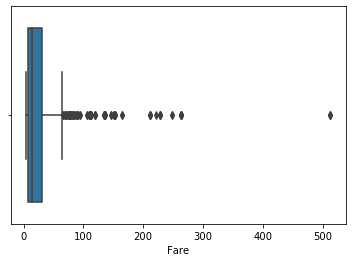

In [312]:
sns.boxplot(df2["Fare"])

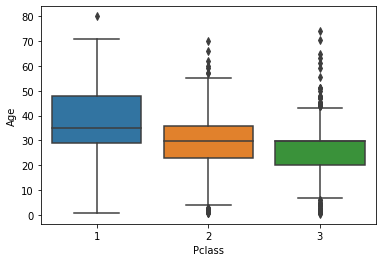

In [313]:
# Multivariable outlier - Pclass vs Age
sns.boxplot(x="Pclass",y="Age",data=df2)

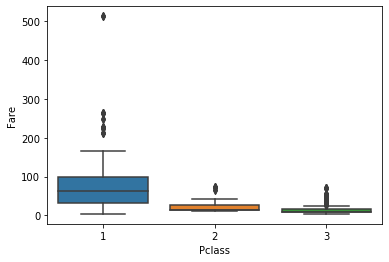

In [314]:
#Multivariable outlier - Pclass vs Fare
sns.boxplot(x="Pclass",y="Fare",data=df2)

c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\manikan

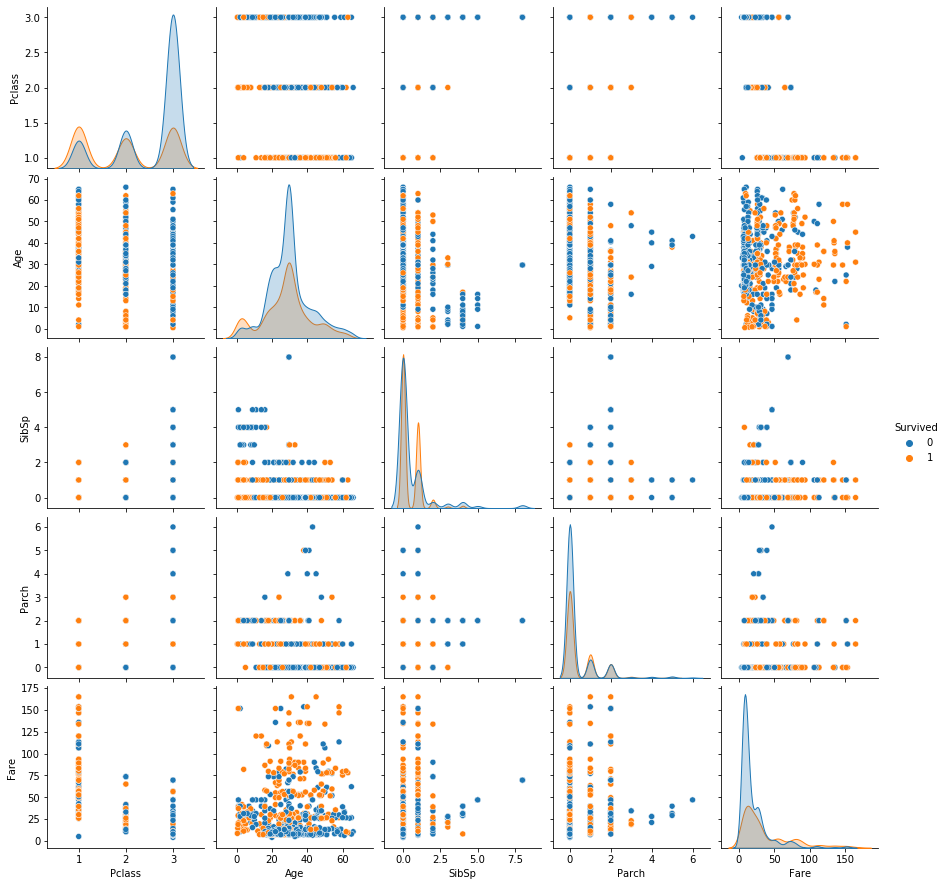

In [315]:
# Let's consider outliers detected by Guassian distribution
df3 = df2[(outlier_Age==False) & (outlier_Fare==False)]
sns.pairplot(df3,hue="Survived",diag_kws={'bw': 0.2})

<font size='5'><b>Convert the categorical columns Sex,Embarked into numeric columns</b></font>

In [316]:
df4 = pd.get_dummies(df3,columns=["Sex","Embarked"])

In [317]:
df4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<font size='5'><b>Prepare X and Y for training</b></font>

In [318]:
x = df4.drop(["Survived"],axis=1)
y = df4["Survived"]

<font size='5'><b>Split the data into train and test</b></font>

In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [320]:
print(x_train.shape)
print(x_test.shape)

(679, 10)
(170, 10)


<font size='5'><b>Fitting RandomForest Classifier on training data</b></font>

In [321]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [322]:
model.score(x_test,y_test)

0.8117647058823529

<font size='5'><b>Evaluation metrics of the model</b></font>

In [323]:
predictions = model.predict(x_test)
classes = ['Not survived','Survived']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,target_names=classes, digits=4))

              precision    recall  f1-score   support

Not survived     0.8367    0.8367    0.8367        98
    Survived     0.7778    0.7778    0.7778        72

    accuracy                         0.8118       170
   macro avg     0.8073    0.8073    0.8073       170
weighted avg     0.8118    0.8118    0.8118       170



In [324]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[82, 16],
       [16, 56]], dtype=int64)

<font size='3'><b>Along rows is <font color = 'blue'>Actual value</font> and along the columns is <font color='blue'>Predicted value</font><br><br>
True_negative  = 95 (Actual is negative and predicted is also negative)<br><br>
False-positive = 14 (Actual is negative and but predicted as positive)<br><br>
False-negative = 21 (Actual is positive and but predicted as negative)<br><br>
    True-positive  = 46 (Actual is positive and predicted is also positive)</b></font>

<font size='5'><b>Formula of Precision and Recall</b></font>

In [325]:
true_positive = 0
true_negative = 0
for i,j in zip(predictions,y_test):
    if(i==j and j==1):
        true_positive+=1
    elif(i==j):
        true_negative+=1
        
total_positive = predictions[predictions==1].shape[0]
false_positive = total_positive - true_positive

total_negative = predictions[predictions==0].shape[0]
false_negative = total_negative - true_negative

In [326]:
precision_0 = true_negative/total_negative
precision_1 = true_positive/total_positive
recall_1 = true_positive/(false_negative+true_positive)
recall_0 = true_negative/(false_positive+true_negative)